In [286]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('ETL_house_wayz_final.csv')
df

,鄉鎮市區,交易標的,實質GDP(百萬元),房貸負擔比,房價所得比,房貸案件樣本數,消費者物價指數,出生人口數,死亡人口數,總人口數,...,夜市,加油站,機場,瓦斯槽,變電所,垃圾場,廟宇,高架道路,建物價格(已扣除車位總價),建物單價元/坪
0,大安區,房地,1314992.0,73.53,17.47,485.0,96.67,3042.0,1877.0,313825.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18680000.0,622666.0
1,中正區,房地,1314992.0,73.53,17.47,195.0,96.89,1658.0,1039.0,161616.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20300000.0,725000.0
2,大同區,房地,1314992.0,73.53,17.47,139.0,96.89,1613.0,923.0,126821.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4200000.0,381818.0
3,內湖區,房地,1314992.0,73.53,17.47,746.0,96.89,3098.0,1377.0,275968.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14000000.0,451612.0
4,松山區,房地,1314992.0,73.53,17.47,339.0,96.89,2118.0,1198.0,210119.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25800000.0,586363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143783,文山區,房地,1547630.0,61.14,15.29,465.0,102.19,1848.0,1694.0,271674.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7540000.0,580000.0
143784,文山區,房地,1547630.0,61.14,15.29,465.0,102.42,1848.0,1694.0,271674.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4000000.0,444444.0
143785,文山區,房地,1547630.0,57.57,14.39,452.0,102.25,1848.0,1694.0,271674.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4450000.0,445000.0
143786,文山區,房地,1547630.0,57.57,14.39,452.0,102.25,1848.0,1694.0,271674.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8850000.0,327777.0


In [287]:
df = df.drop(df[df['建物單價元/坪']<10000].index)
df.reset_index(drop=True, inplace=True)
df['建物單價元/坪'] = df['建物單價元/坪'].astype('int').apply(lambda x:x/10000)

# df['建物單價元/坪']

In [288]:
# df['建築年'] = 
df['交易月'] = df['交易年月'].apply(lambda x : int(x.split("/")[1])).apply(lambda x:math.sin(x/4))
df['交易年'] = df['交易年'].astype(str)


df = df.drop(["交易年月"], axis=1)
df = df.drop(['土地區段位置建物區段門牌'],axis=1)
df = df.drop(['車位單價'],axis=1)
df = df.drop(['總價元'],axis=1)
df = df.drop(['車位總價'],axis=1)
df = df.drop(['建物價格(已扣除車位總價)'],axis=1)


In [289]:
num_features = []
notnum_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
    else:
        notnum_features.append(feature)

print(f'lehgth of all featrues : {len(df.columns)}\n')
print(f'length of Numeric Features : {len(num_features)}\n Numeric Features : {num_features}\n')
print(f'length of Not Numeric Features : {len(notnum_features)}\n Not Numeric Features : {notnum_features}')


lehgth of all featrues : 52

length of Numeric Features : 41
 Numeric Features : ['實質GDP(百萬元)', '房貸負擔比', '房價所得比', '房貸案件樣本數', '消費者物價指數', '出生人口數', '死亡人口數', '總人口數', '出生率', '死亡率', '移出人口數', '移入人口數', '移出人口率', '移入人口率', 'M1B(年增率)', '車位每個/坪', '建築年', '總樓層數', '土地移轉總面積(坪)', '建物移轉總面積(坪)', '交易筆棟數_土地', '交易筆棟數_建物', '交易筆棟數_車位', '屋齡', '車位移轉總面積(坪)', '車位總坪數', '建物坪數(已扣除車位坪數)', '墳墓', '殯儀館', '八大行業', '市場', '夜市', '加油站', '機場', '瓦斯槽', '變電所', '垃圾場', '廟宇', '高架道路', '建物單價元/坪', '交易月']

length of Not Numeric Features : 11
 Not Numeric Features : ['鄉鎮市區', '交易標的', '都市土地使用分區', '建物型態', '主要用途', '主要建材', '有無管理組織', '車位類別', '土地區段位置建物區段門牌1', '土地區段位置建物區段門牌2', '交易年']


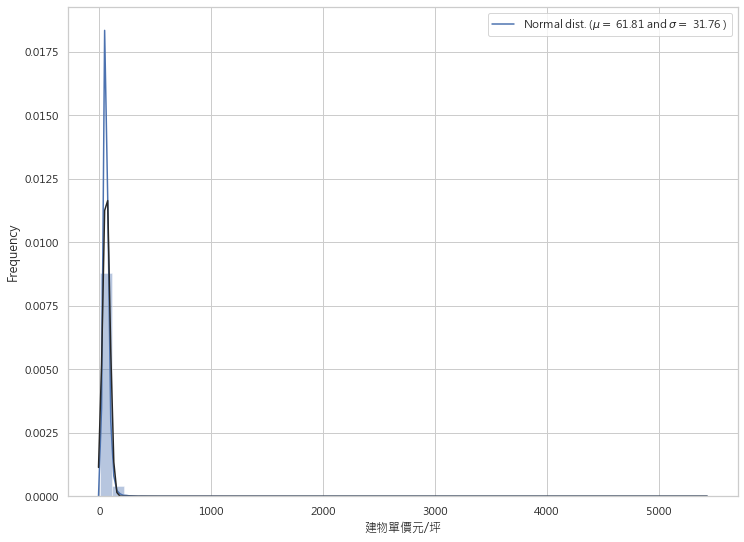

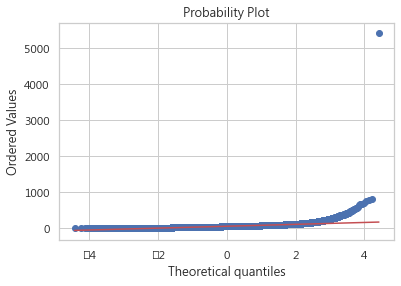

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.font_manager import FontProperties

prop = FontProperties(fname='C:\\Windows\\Fonts\\msjh.ttc')
sns.set(font=prop.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

plt.subplots(figsize=(12,9))
sns.distplot(df['建物單價元/坪'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df['建物單價元/坪'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df['建物單價元/坪'], plot=plt)
plt.show()

In [291]:
df['建物單價元/坪'] = np.log(df['建物單價元/坪'])

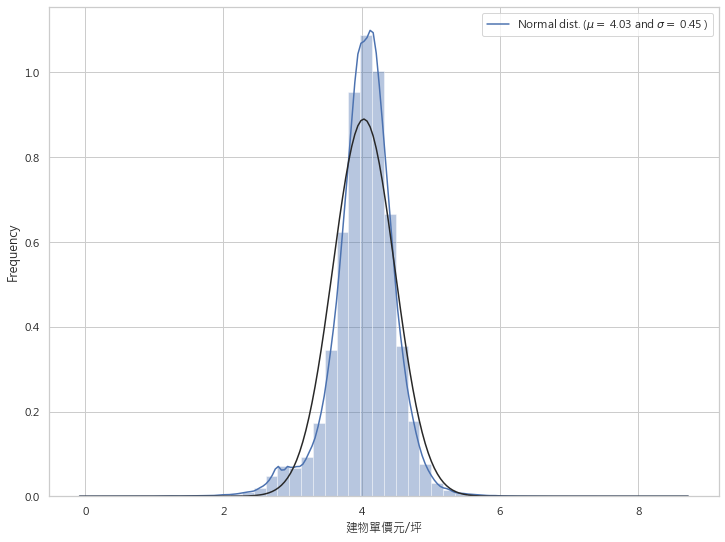

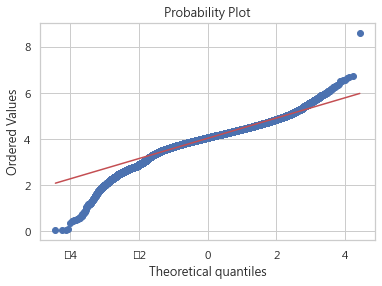

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

plt.subplots(figsize=(12,9))
sns.distplot(df['建物單價元/坪'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df['建物單價元/坪'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df['建物單價元/坪'], plot=plt)
plt.show()

In [293]:
ll = ['墳墓', '殯儀館', '八大行業', '市場', '夜市', '加油站', '機場', '瓦斯槽',
      '變電所', '垃圾場', '廟宇', '高架道路','建築年']
      
for i in ll:
      num_features.remove(i)

print(num_features)

['實質GDP(百萬元)', '房貸負擔比', '房價所得比', '房貸案件樣本數', '消費者物價指數', '出生人口數', '死亡人口數', '總人口數', '出生率', '死亡率', '移出人口數', '移入人口數', '移出人口率', '移入人口率', 'M1B(年增率)', '車位每個/坪', '總樓層數', '土地移轉總面積(坪)', '建物移轉總面積(坪)', '交易筆棟數_土地', '交易筆棟數_建物', '交易筆棟數_車位', '屋齡', '車位移轉總面積(坪)', '車位總坪數', '建物坪數(已扣除車位坪數)', '建物單價元/坪', '交易月']


In [294]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
prop = FontProperties(fname='C:\\Windows\\Fonts\\msjh.ttc')
sns.set(font=prop.get_family())
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
#-----------------------設定中文字型-------------------
# df = df.drop(df[df['建物單價元/坪']<10000].index)

for i,f in enumerate(num_features):
    ori_series = df[f]
    qt1 = ori_series.quantile(q=0.25)
    qt3 = ori_series.quantile(q=0.75)
    iqr = qt3-qt1
    
    ori_series[ori_series>(qt3 + 1.5*iqr)] = np.nan
    ori_series[ori_series<(qt1 - 1.5*iqr)] = np.nan
    df[f] = ori_series
    #--------------------------------------------------------#
#     plt.title(f) 
#     plt.boxplot(df[f])
#     plt.show()
df = df.dropna(how='any',axis=0)

In [295]:
corr = df.corr()
corr_drop = corr.loc['建物單價元/坪'] 
corr_drop

實質GDP(百萬元)      -0.004745
房貸負擔比           -0.020618
房價所得比           -0.031852
房貸案件樣本數         -0.080780
消費者物價指數         -0.016878
出生人口數           -0.176693
死亡人口數           -0.096226
總人口數            -0.129868
出生率             -0.107640
死亡率              0.069621
移出人口數            0.108550
移入人口數            0.120102
移出人口率            0.220309
移入人口率            0.222232
M1B(年增率)         0.058821
車位每個/坪           0.050237
建築年              0.308643
總樓層數             0.277625
土地移轉總面積(坪)      -0.271638
建物移轉總面積(坪)      -0.081705
交易筆棟數_土地         0.045044
交易筆棟數_建物              NaN
交易筆棟數_車位         0.041714
屋齡              -0.304592
車位移轉總面積(坪)       0.083425
車位總坪數            0.061754
建物坪數(已扣除車位坪數)   -0.090763
墳墓              -0.006213
殯儀館             -0.016227
八大行業                  NaN
市場               0.001906
夜市               0.079390
加油站              0.039287
機場               0.033494
瓦斯槽             -0.029471
變電所              0.035748
垃圾場                   NaN
廟宇               0.003368
高架道路        

<AxesSubplot:>

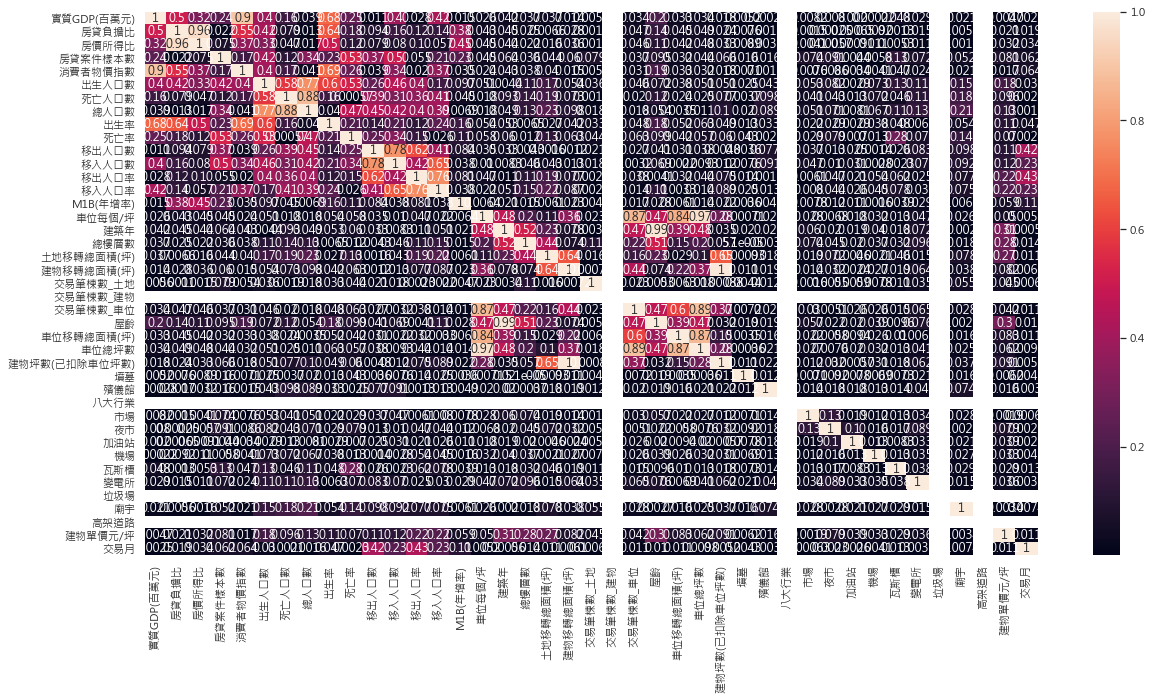

In [296]:
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [297]:
#有高度相關性的欄位
corr_drop[(corr_drop>0.1) | (corr_drop<-0.1)].index ### | =>或者or...(此步驟在去除0.3~-0.3低度負相關的資料!!!)

Index(['出生人口數', '總人口數', '出生率', '移出人口數', '移入人口數', '移出人口率', '移入人口率', '建築年',
       '總樓層數', '土地移轉總面積(坪)', '屋齡', '建物單價元/坪'],
      dtype='object')

In [298]:
#移除低相關欄位(手動!!)
renum = ['移出人口數','移入人口數']

for ii in renum:
    num_features.remove(ii)
print(num_features)

['實質GDP(百萬元)', '房貸負擔比', '房價所得比', '房貸案件樣本數', '消費者物價指數', '出生人口數', '死亡人口數', '總人口數', '出生率', '死亡率', '移出人口率', '移入人口率', 'M1B(年增率)', '車位每個/坪', '總樓層數', '土地移轉總面積(坪)', '建物移轉總面積(坪)', '交易筆棟數_土地', '交易筆棟數_建物', '交易筆棟數_車位', '屋齡', '車位移轉總面積(坪)', '車位總坪數', '建物坪數(已扣除車位坪數)', '建物單價元/坪', '交易月']


In [299]:
#將消除的低相關的欄位
rm2 = []
for i in num_features:
    if i not in corr_drop[(corr_drop>0.1) | (corr_drop<-0.1)].index:
        rm2.append(i)
print(rm2)

['實質GDP(百萬元)', '房貸負擔比', '房價所得比', '房貸案件樣本數', '消費者物價指數', '死亡人口數', '死亡率', 'M1B(年增率)', '車位每個/坪', '建物移轉總面積(坪)', '交易筆棟數_土地', '交易筆棟數_建物', '交易筆棟數_車位', '車位移轉總面積(坪)', '車位總坪數', '建物坪數(已扣除車位坪數)', '交易月']


In [300]:
#移除低相關性欄位

for i2 in rm2:
    num_features.remove(i2)

# num_features.append('交易年')
# num_features.append('交易月')

print(len(num_features))
print(num_features)

9
['出生人口數', '總人口數', '出生率', '移出人口率', '移入人口率', '總樓層數', '土地移轉總面積(坪)', '屋齡', '建物單價元/坪']


In [301]:
df_num_features = pd.DataFrame()

for i in num_features:
    if df[i].isnull().any():
        print(f'{i} has missing value')
    else:
        df_num_features[i] = df[i]

display(df_num_features)

,出生人口數,總人口數,出生率,移出人口率,移入人口率,總樓層數,土地移轉總面積(坪),屋齡,建物單價元/坪
3,3098.0,275968.0,11.225939,0.00516,0.00577,5.0,9.804025,32.0,3.810238
4,2118.0,210119.0,10.080002,0.00629,0.00620,7.0,10.747825,20.0,4.071354
5,3217.0,287298.0,11.197433,0.00483,0.00481,5.0,9.438000,33.0,4.115622
7,2490.0,224193.0,11.106502,0.00645,0.00715,6.0,3.025000,15.0,3.992345
8,2490.0,224193.0,11.106502,0.00645,0.00715,7.0,1.908775,33.0,3.605990
...,...,...,...,...,...,...,...,...,...
143694,1312.0,204043.0,6.430017,0.00620,0.00440,14.0,2.023725,11.0,4.570954
143699,958.0,125909.0,7.608670,0.00510,0.00433,7.0,6.225450,37.0,3.965131
143702,1848.0,271674.0,6.802270,0.00535,0.00393,11.0,4.773450,24.0,4.060443
143704,1848.0,271674.0,6.802270,0.00415,0.00320,5.0,4.168450,26.0,3.795489


<AxesSubplot:>

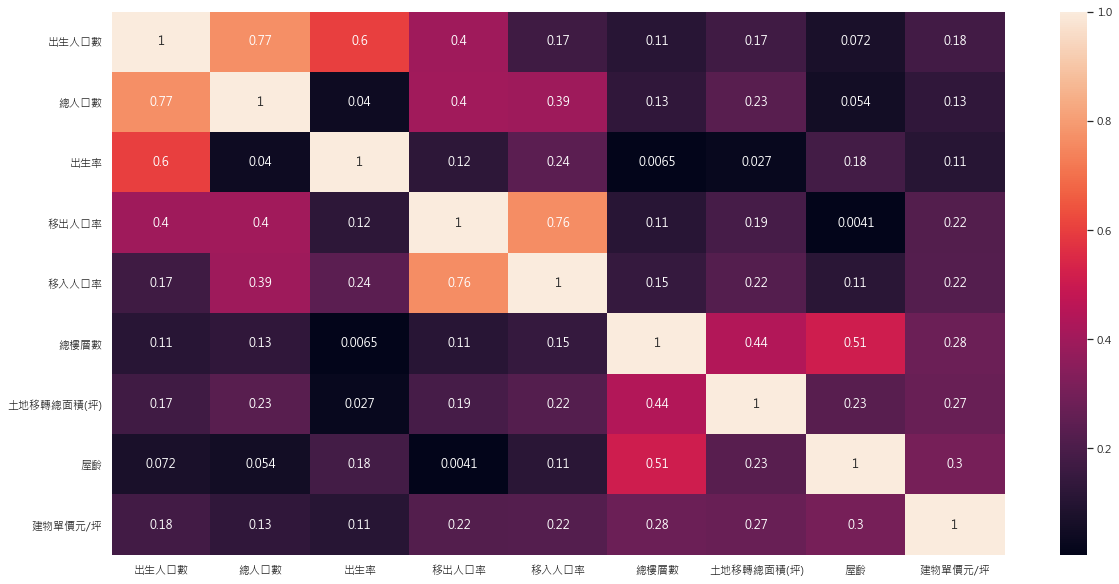

In [302]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_num_features.corr().abs(),  annot=True)

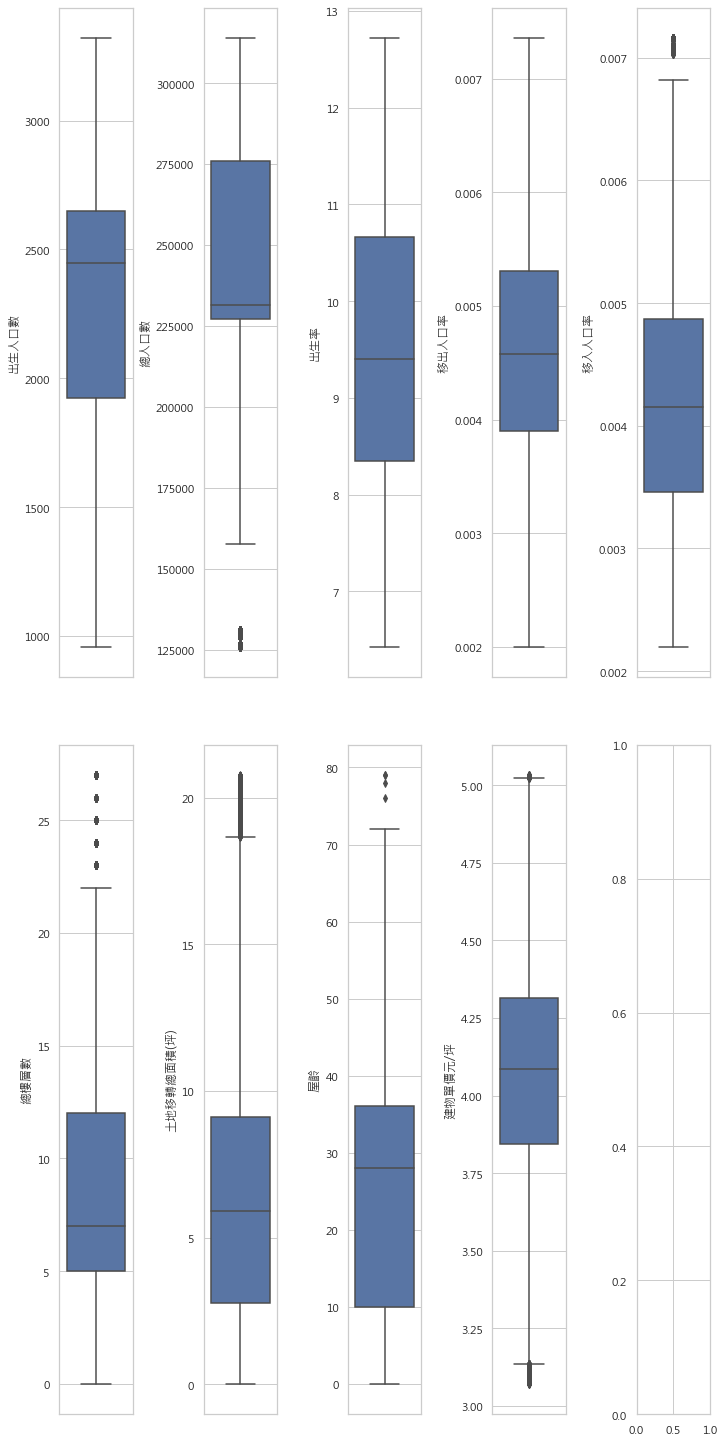

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10,20))
index = 0
axs = axs.flatten()

for k,v in df_num_features.items():
    sns.boxplot(y=k, data=df_num_features, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [304]:
print(num_features)

['出生人口數', '總人口數', '出生率', '移出人口率', '移入人口率', '總樓層數', '土地移轉總面積(坪)', '屋齡', '建物單價元/坪']


In [305]:
for i,f in enumerate(num_features):
    ori_series = df_num_features[f]
    qt1 = ori_series.quantile(q=0.25)
    qt3 = ori_series.quantile(q=0.75)
    iqr = qt3-qt1
    ori_series[ori_series>(qt3 + 1.5*iqr)] = qt3 + 1.5*iqr
    ori_series[ori_series<(qt1 - 1.5*iqr)] = qt1 - 1.5*iqr
    df_num_features[f] = ori_series

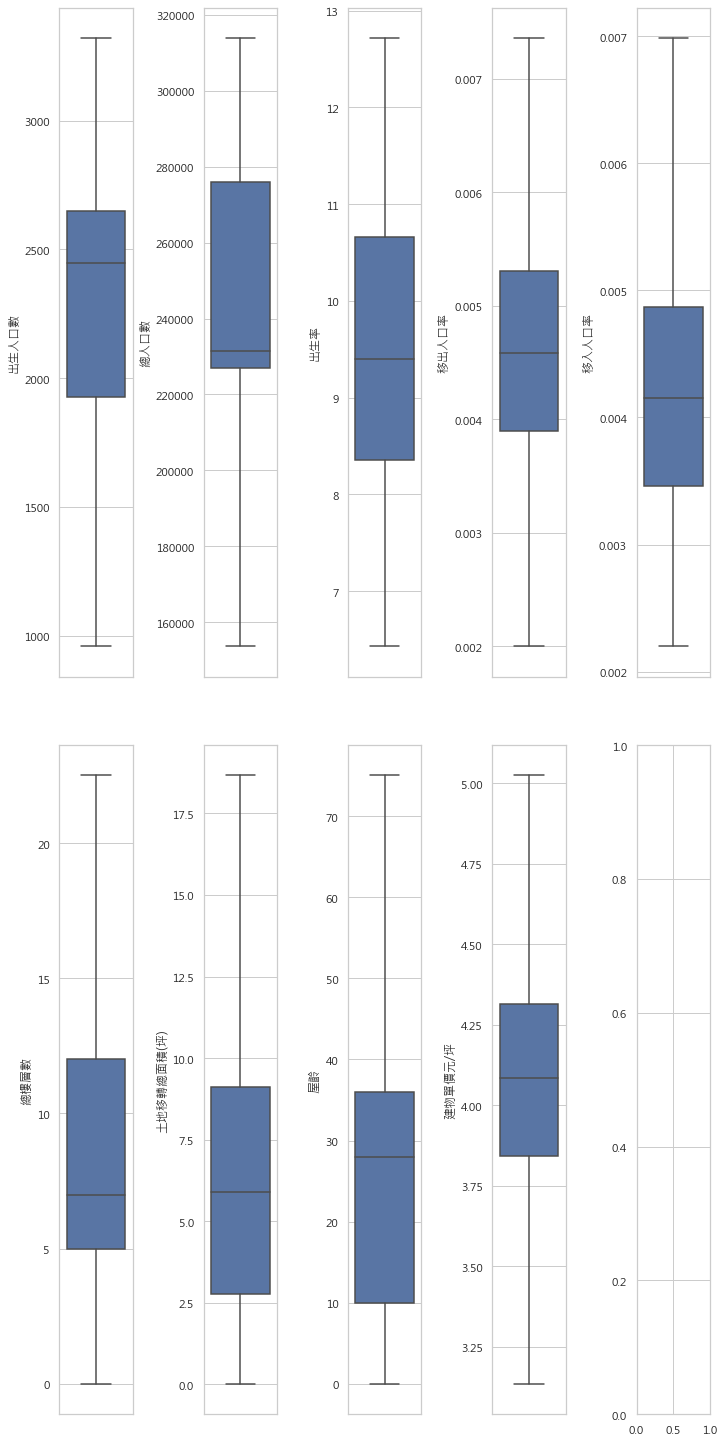

In [306]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10,20))
index = 0
axs = axs.flatten()

for k,v in df_num_features.items():
    sns.boxplot(y=k, data=df_num_features, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

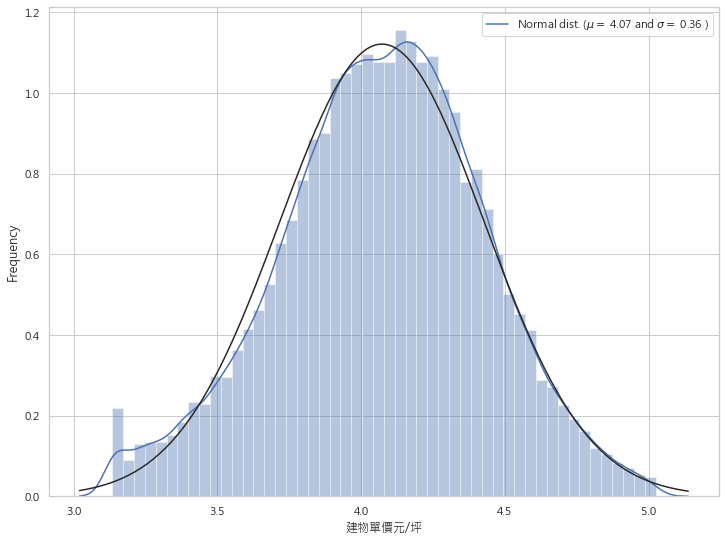

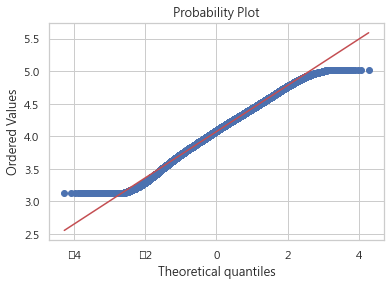

In [307]:
plt.subplots(figsize=(12,9))
sns.distplot(df_num_features['建物單價元/坪'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df_num_features['建物單價元/坪'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(df_num_features['建物單價元/坪'], plot=plt)
plt.show()

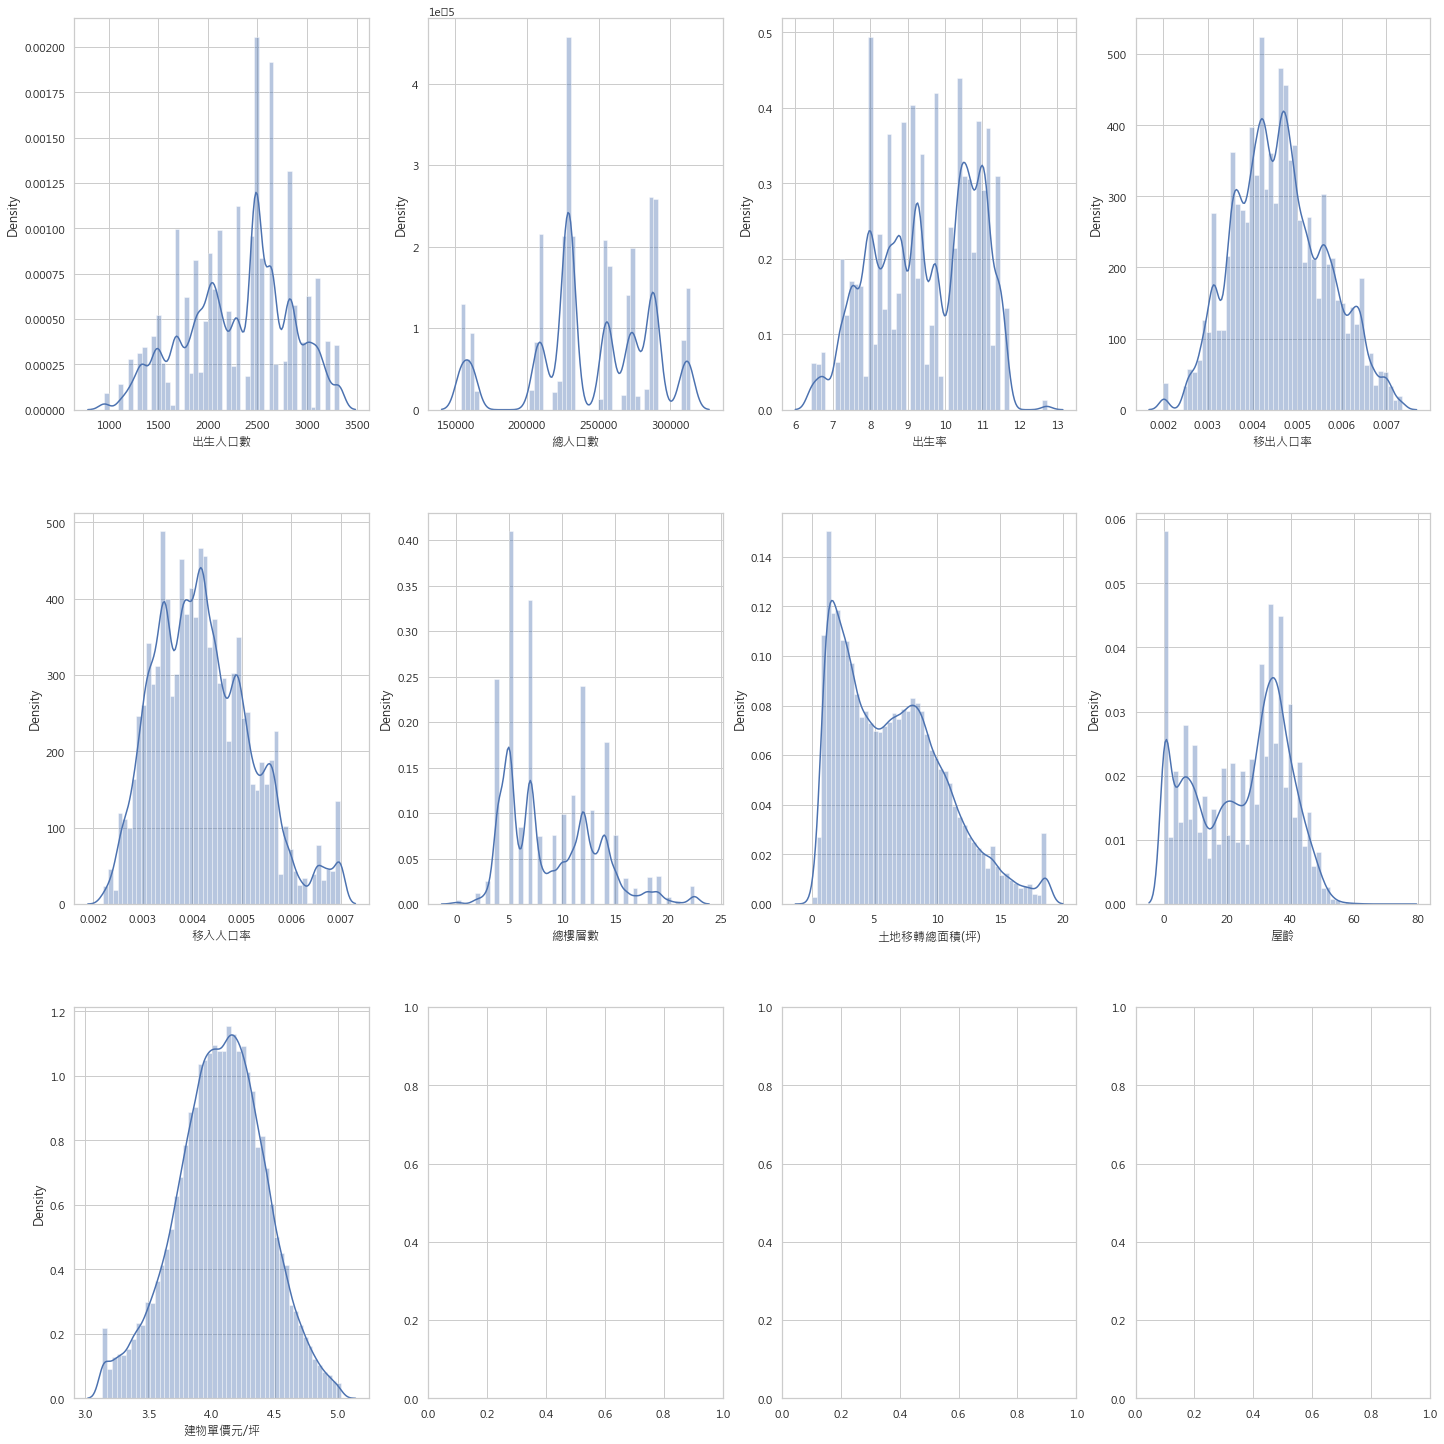

In [308]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20,20))
index = 0
axs = axs.flatten()

for k,v in df_num_features.items():
    sns.distplot(v, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

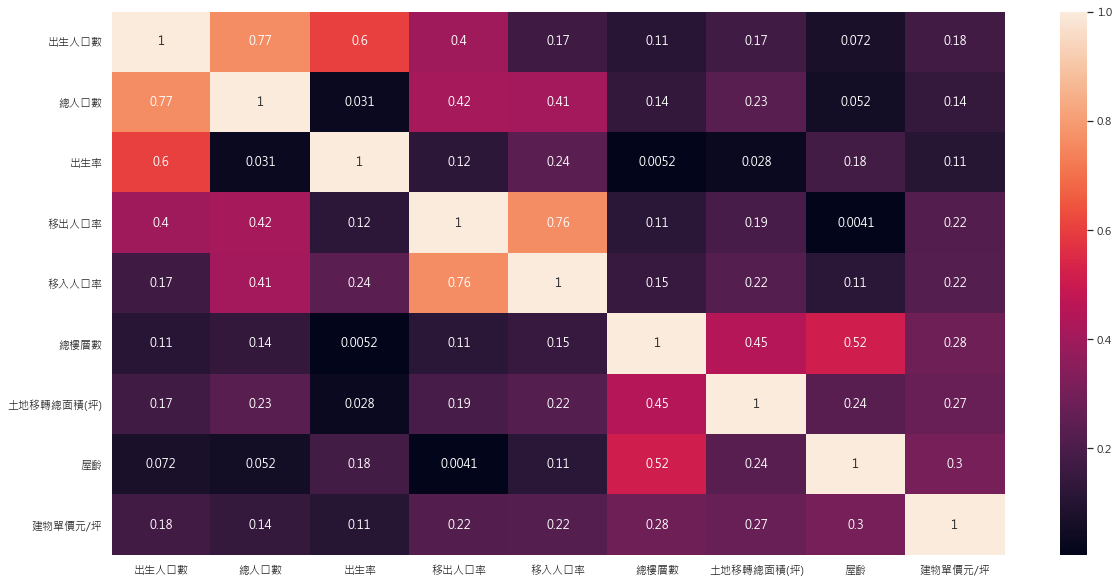

In [309]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_num_features.corr().abs(),  annot=True)

In [310]:
notnum_features

['鄉鎮市區',
 '交易標的',
 '都市土地使用分區',
 '建物型態',
 '主要用途',
 '主要建材',
 '有無管理組織',
 '車位類別',
 '土地區段位置建物區段門牌1',
 '土地區段位置建物區段門牌2',
 '交易年']

In [311]:
l2 = ['土地區段位置建物區段門牌1','土地區段位置建物區段門牌2','交易年']

for i in l2:
    notnum_features.remove(i)
notnum_features

['鄉鎮市區', '交易標的', '都市土地使用分區', '建物型態', '主要用途', '主要建材', '有無管理組織', '車位類別']

In [312]:
df_notnum_features_label = pd.DataFrame()

for i in notnum_features:
    df_notnum_features_label[i] = df[i] 

df_notnum_features = pd.get_dummies(df_notnum_features_label)
    
df_notnum_features

,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_信義區,鄉鎮市區_內湖區,鄉鎮市區_北投區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,鄉鎮市區_松山區,...,主要用途_見其他登記事項,主要建材_其他,主要建材_磚造,主要建材_鋼筋造,主要建材_鋼骨造,有無管理組織_有,有無管理組織_無,車位類別_其他,車位類別_平面,車位類別_機械
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143694,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
143699,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
143702,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
143704,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0


In [313]:
df_dd = pd.concat([df_notnum_features, df_num_features], axis=1)
df_dd

,鄉鎮市區_中山區,鄉鎮市區_中正區,鄉鎮市區_信義區,鄉鎮市區_內湖區,鄉鎮市區_北投區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,鄉鎮市區_松山區,...,車位類別_機械,出生人口數,總人口數,出生率,移出人口率,移入人口率,總樓層數,土地移轉總面積(坪),屋齡,建物單價元/坪
3,0,0,0,1,0,0,0,0,0,0,...,0,3098.0,275968.0,11.225939,0.00516,0.005770,5.0,9.804025,32.0,3.810238
4,0,0,0,0,0,0,0,0,0,1,...,0,2118.0,210119.0,10.080002,0.00629,0.006200,7.0,10.747825,20.0,4.071354
5,0,0,0,0,0,1,0,0,0,0,...,0,3217.0,287298.0,11.197433,0.00483,0.004810,5.0,9.438000,33.0,4.115622
7,1,0,0,0,0,0,0,0,0,0,...,0,2490.0,224193.0,11.106502,0.00645,0.006985,6.0,3.025000,15.0,3.992345
8,1,0,0,0,0,0,0,0,0,0,...,0,2490.0,224193.0,11.106502,0.00645,0.006985,7.0,1.908775,33.0,3.605990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143694,0,0,0,0,0,0,0,0,0,1,...,0,1312.0,204043.0,6.430017,0.00620,0.004400,14.0,2.023725,11.0,4.570954
143699,0,0,0,0,0,0,1,0,0,0,...,0,958.0,153640.5,7.608670,0.00510,0.004330,7.0,6.225450,37.0,3.965131
143702,0,0,0,0,0,0,0,0,1,0,...,0,1848.0,271674.0,6.802270,0.00535,0.003930,11.0,4.773450,24.0,4.060443
143704,0,0,0,0,0,0,0,0,1,0,...,0,1848.0,271674.0,6.802270,0.00415,0.003200,5.0,4.168450,26.0,3.795489


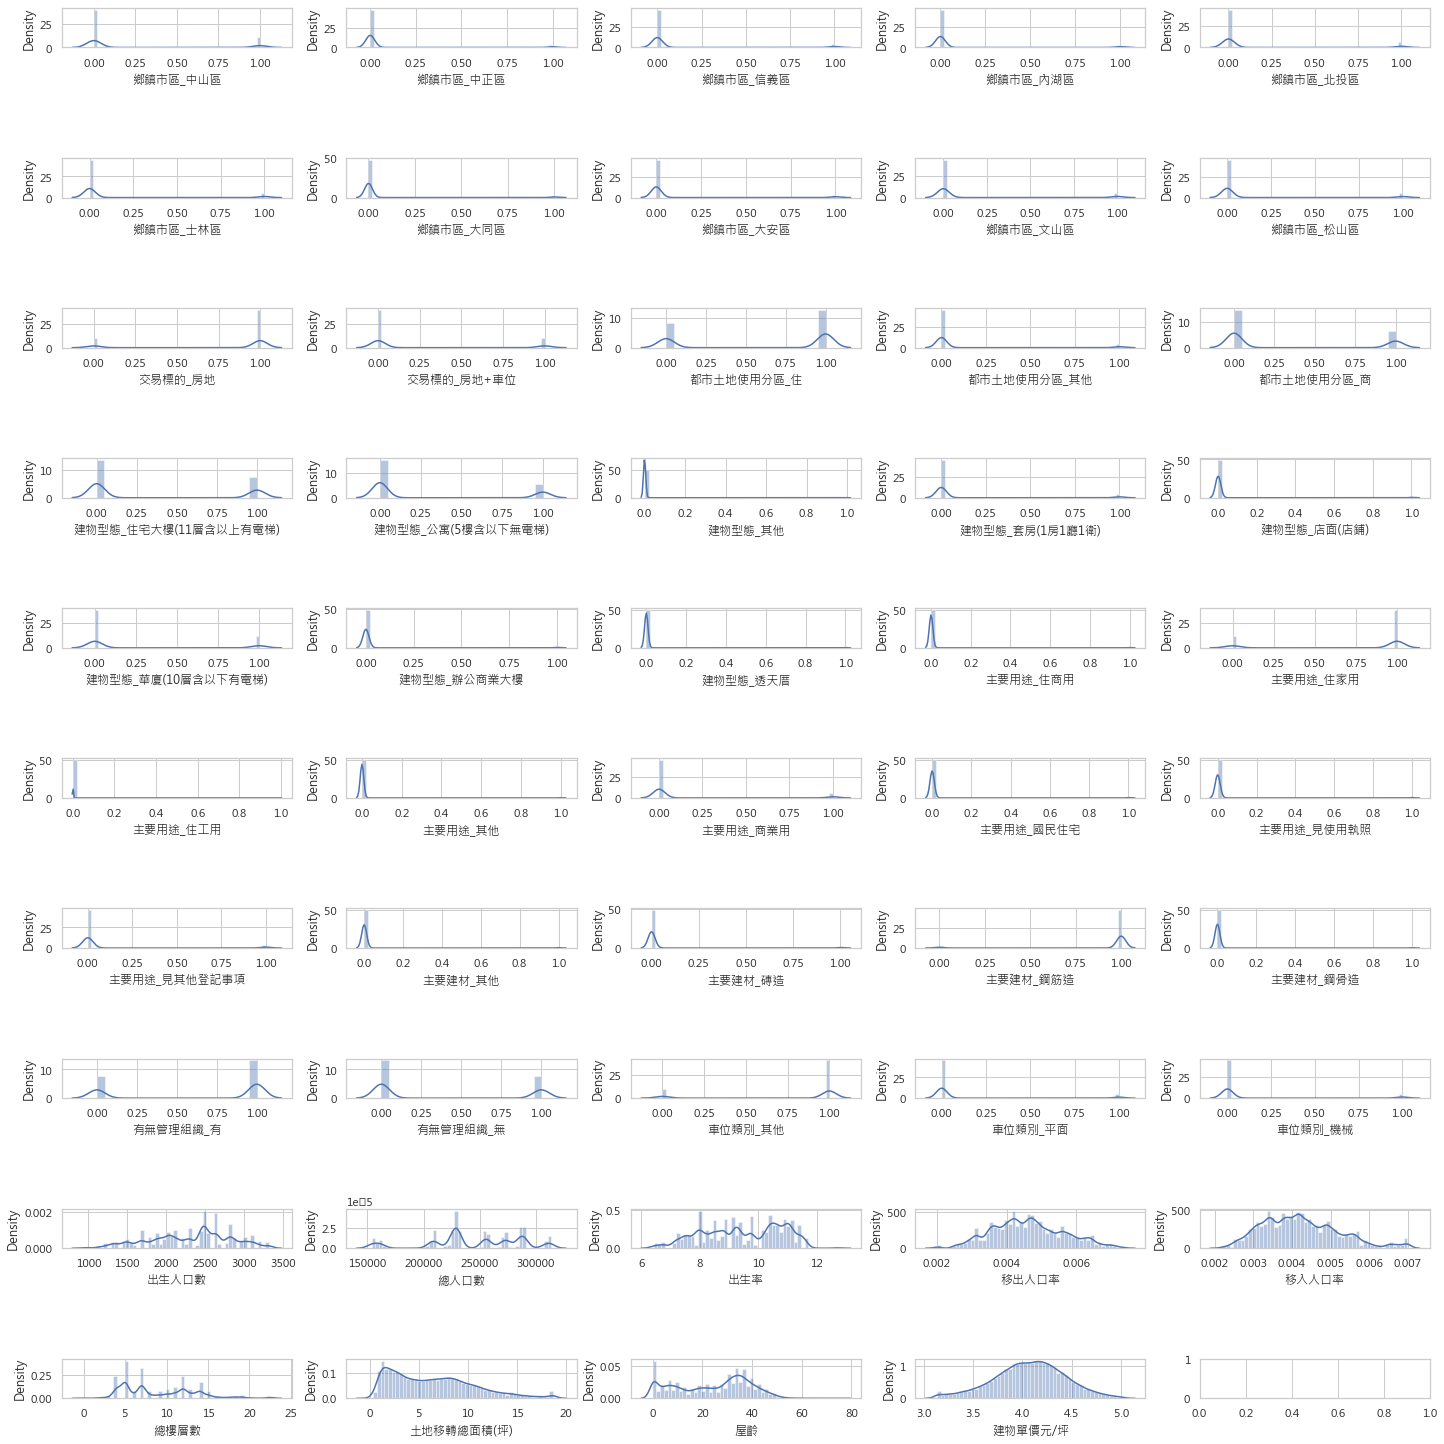

In [314]:
fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(20,20))
index = 0
axs = axs.flatten()

for k,v in df_dd.items():
    sns.distplot(v, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [315]:
df_dd.to_csv('house_data313.csv', index=False, encoding='utf-8-sig')